# **\[SOLAR_A\]** PLOT (Raw Data)

JiyunLim  
2023-10-06

## Import

In [1]:
!conda env list

# conda environments:
#
base                     /home/jy/anaconda3
eptstgnn                 /home/jy/anaconda3/envs/eptstgnn
llama                    /home/jy/anaconda3/envs/llama
mp                       /home/jy/anaconda3/envs/mp
py38                  *  /home/jy/anaconda3/envs/py38
py38r40                  /home/jy/anaconda3/envs/py38r40
smartfarm                /home/jy/anaconda3/envs/smartfarm
smartfarm2               /home/jy/anaconda3/envs/smartfarm2
torch                    /home/jy/anaconda3/envs/torch


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [3]:
df = pd.read_csv('./data_eng_230710.csv')

In [4]:
y = df.loc[:,'Bukchoncheon':'Gyeongju-si'].to_numpy()
yU = df.loc[:,'Bukchoncheon_Upper':'Gyeongju-si_Upper'].to_numpy()
yP = np.divide(y, yU+1e-10)
t = df.loc[:,'date']
regions = list(df.loc[:,'Bukchoncheon':'Gyeongju-si'].columns)

## Plot Raw Data

In [5]:
import plotly

In [6]:
reg_dict = {i:reg for i,reg in enumerate(regions)}

In [7]:
start = 0 
end = 0+24*20
city = 19 # 전주
city_idx = [7,8,17,22]

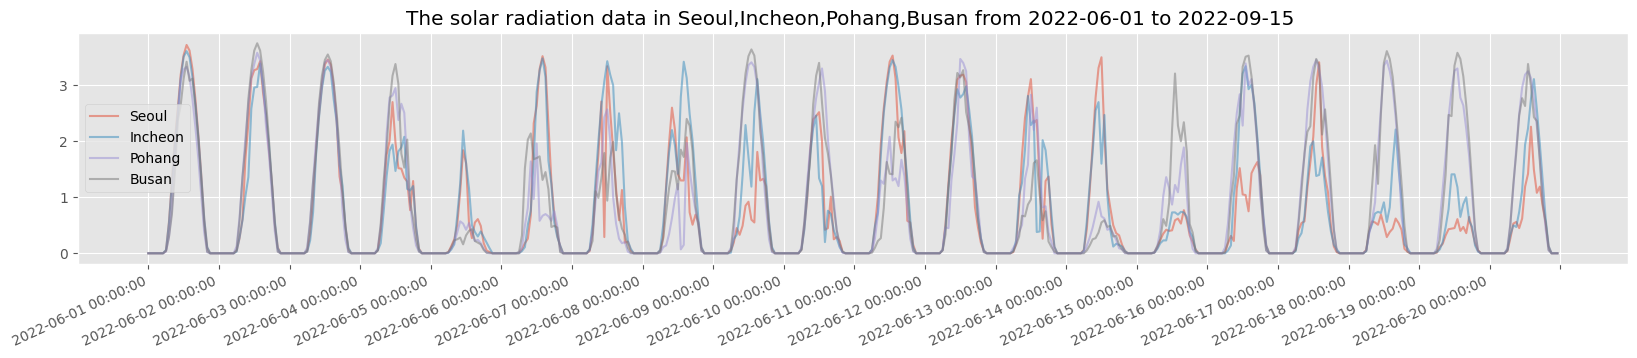

In [433]:
with plt.style.context('ggplot'):
    # plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['figure.figsize'] = [20, 3]  
    plt.plot(t[start:end],y[start:end,city_idx[0]],'-',label= regions[city_idx[0]], alpha=0.5)
    plt.plot(t[start:end],y[start:end,city_idx[1]],'-',label=regions[city_idx[1]], alpha=0.5)
    plt.plot(t[start:end], y[start:end,city_idx[2]], '-', label=regions[city_idx[2]], alpha=0.5)
    plt.plot(t[start:end], y[start:end,city_idx[3]], '-', label=regions[city_idx[3]], alpha=0.5)
    tick_interval = 24
    plt.xticks(range(0, (end-start) + 1, tick_interval),rotation=25, ha='right')        
    plt.legend()
    plt.title("The solar radiation data in {} from {} to {} ".format(','.join([regions[i] for i in city_idx]),t.to_list()[0][:10],t.to_list()[-1][:10]))

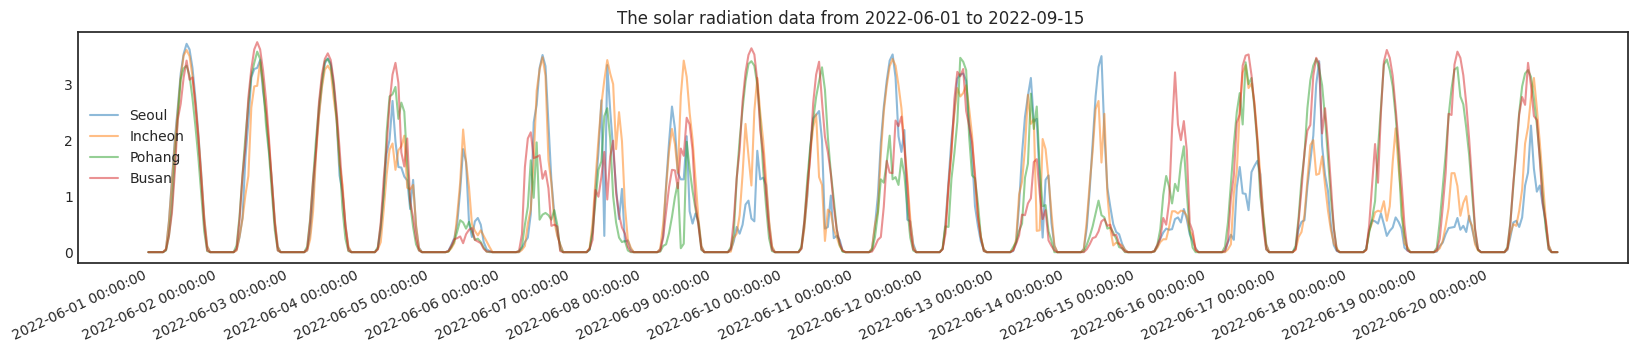

In [366]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['figure.figsize'] = [20, 3]  
    plt.plot(t[start:end],y[start:end,city_idx[0]],'-',label= regions[city_idx[0]], alpha=0.5)
    plt.plot(t[start:end],y[start:end,city_idx[1]],'-',label=regions[city_idx[1]], alpha=0.5)
    plt.plot(t[start:end], y[start:end,city_idx[2]], '-', label=regions[city_idx[2]], alpha=0.5)
    plt.plot(t[start:end], y[start:end,city_idx[3]], '-', label=regions[city_idx[3]], alpha=0.5)
    tick_interval = 24
    plt.xticks(range(0, (end-start) + 1, tick_interval),rotation=25, ha='right')        
    plt.legend()
    # plt.title("The solar radiation data in {} from {} to {} ".format(regions[city],t.to_list()[0][:10],t.to_list()[-1][:10]))
    plt.title("The solar radiation data from {} to {} ".format(t.to_list()[0][:10],t.to_list()[-1][:10]))

In [367]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

for i in range(len(city_idx)):
    fig.add_trace(go.Scatter(x=t[start:end], y=y[start:end, city_idx[i]], mode='lines', name=regions[city_idx[i]], opacity=0.5))

tick_interval = 24
fig.update_xaxes(tickvals=list(range(0, (end-start) + 1, tick_interval)), ticktext=[t[i] for i in range(start, end+1)], tickangle=25, tickfont=dict(size=10))
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.update_layout(title="The solar radiation data in {} from {} to {}".format(','.join([regions[i] for i in city_idx]), t.to_list()[0][:10],t.to_list()[-1][:10]))
fig.update_layout(width=1000, height=300)

fig.show()

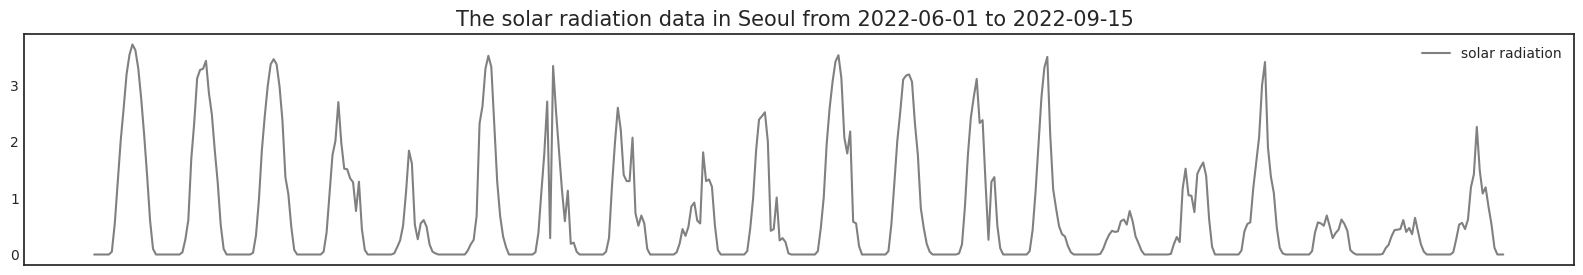

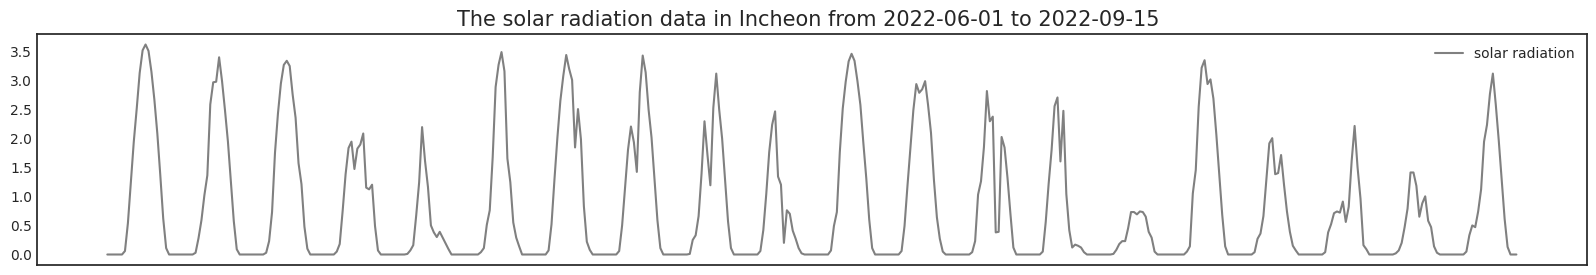

In [368]:
start = 0 
end = 0+24*20
city_idx = [7,8] # [7,8,17,43]

with plt.style.context('seaborn-white'):
    plt.rcParams['figure.figsize'] = [20, 3]  
    tick_interval=24
    for city in city_idx:
        plt.figure()  

        plt.plot(t[start:end], y[start:end, city], '-', label='solar radiation', color='grey')

        # plt.xticks(range(0, (end - start) + 1, tick_interval), rotation=25, ha='right')
        plt.xticks('')

        plt.legend()

        plt.title("The solar radiation data in {} from {} to {} ".format(regions[city], t.to_list()[0][:10], t.to_list()[-1][:10]), fontsize=15)
    
plt.savefig('./solar_data.png')
plt.show()

## Add Upper envelope

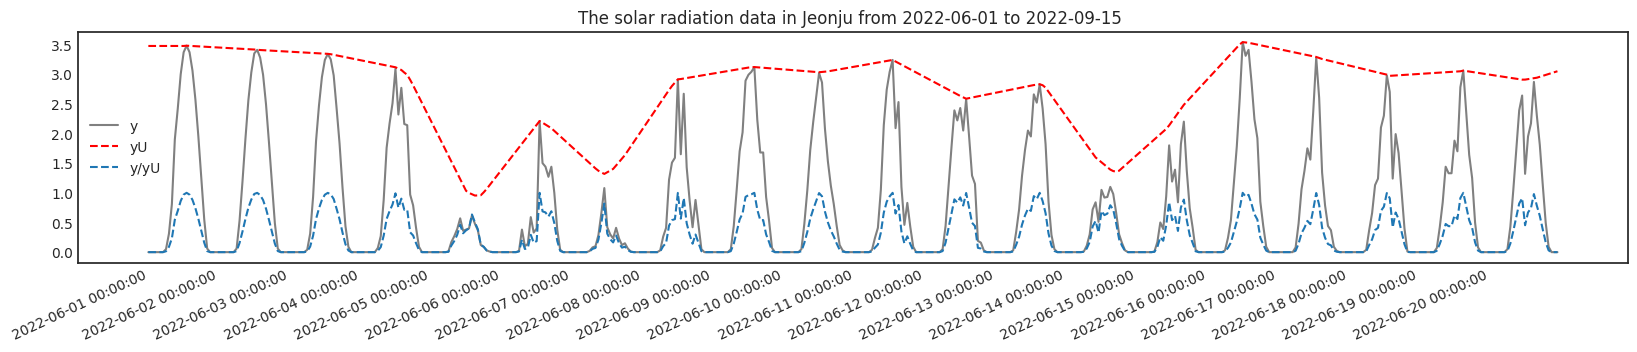

In [369]:
start = 0 
end = 0+24*20
city = 19 # 전주
with plt.style.context('seaborn-white'):
    # plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['figure.figsize'] = [20, 3]  # [가로 크기, 세로 크기]
    plt.plot(t[start:end],y[start:end,city],'-',label='y', color='grey')
    plt.plot(t[start:end],yU[start:end,city],'--',label='yU', color='red')
    plt.plot(t[start:end],yP[start:end,city],'--',label='y/yU')
    tick_interval = 24
    plt.xticks(range(0, (end-start) + 1, tick_interval),rotation=25, ha='right')        
    plt.legend()
    plt.title("The solar radiation data in {} from {} to {} ".format(regions[city],t.to_list()[0][:10],t.to_list()[-1][:10]))

In [477]:
# reg_dict

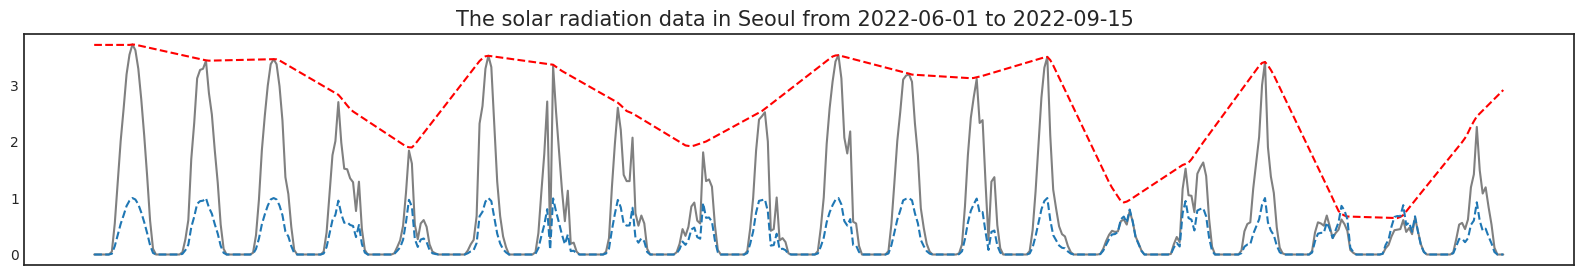

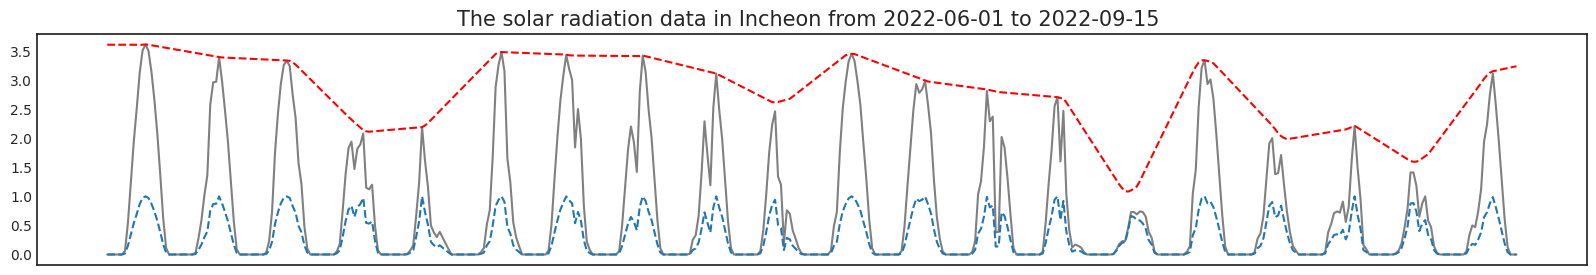

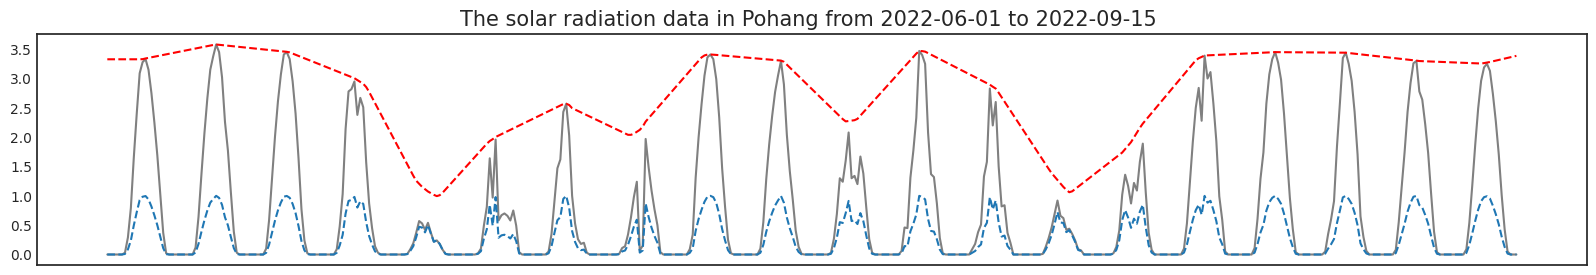

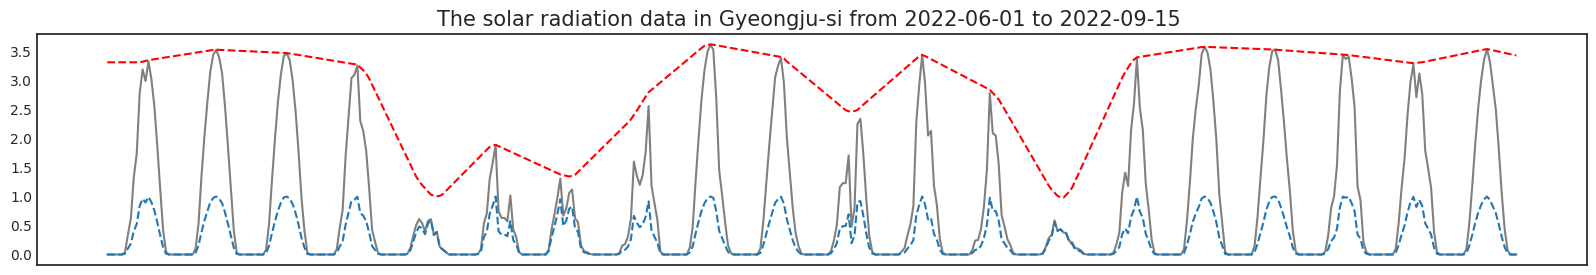

In [478]:
city_idx = [7,8,17,43] #[7,8,17,22] 부산대신 경주..

with plt.style.context('seaborn-white'):
    plt.rcParams['figure.figsize'] = [20, 3]  

    for city in city_idx:
        plt.figure()  

        plt.plot(t[start:end], y[start:end, city], '-', label='y', color='grey')
        plt.plot(t[start:end], yU[start:end, city], '--', label='yU', color='red')
        plt.plot(t[start:end], yP[start:end, city], '--', label='y/yU')

        # plt.xticks(range(0, (end - start) + 1, tick_interval), rotation=25, ha='right')
        plt.xticks('')

        # plt.legend()

        plt.title("The solar radiation data in {} from {} to {} ".format(regions[city], t.to_list()[0][:10], t.to_list()[-1][:10]), fontsize=15)

plt.show()

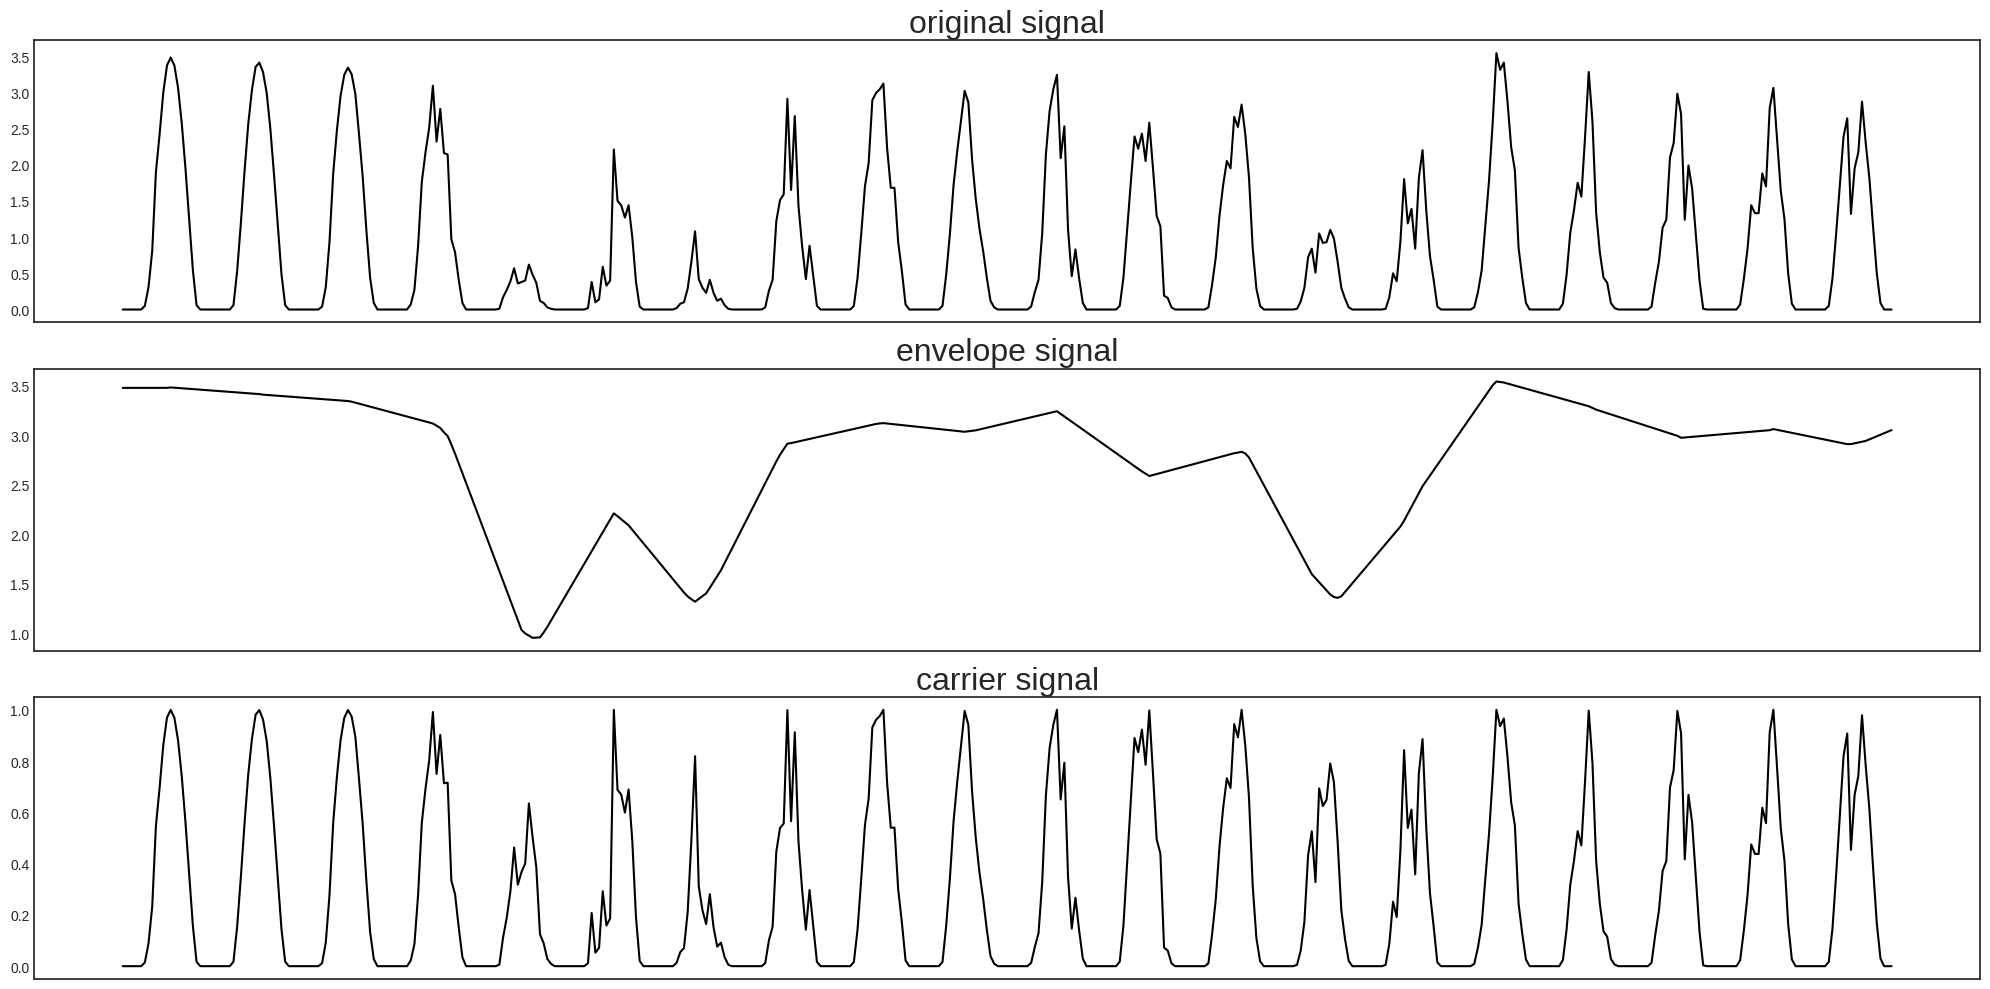

In [13]:
with plt.style.context('seaborn-white'):
    fig,axes = plt.subplots(3,1,figsize=(20,10))
    axes[0].plot(t[start:end], y[start:end, city], '-', label='solar radiation', color='k')
    axes[1].plot(t[start:end], yU[start:end, city], '-', label='modulation component', color='k')
    axes[2].plot(t[start:end], yP[start:end, city], '-', label='periodic component', color='k')

    # plt.xticks(range(0, (end - start) + 1, tick_interval), rotation=25, ha='right')
    # axes[0].set_xticks(range(0, (end-start)+1, 24))
    # axes[0].tick_params(axis='x', rotation=25)
    axes[0].set_xticks('')
    axes[1].set_xticks('')
    axes[2].set_xticks('')
    
    axes[0].set_title('original signal', fontsize=23)
    axes[1].set_title('envelope signal', fontsize=23)
    axes[2].set_title('carrier signal', fontsize=23)

    # plt.legend()

    # plt.title("The solar radiation data in {} from {} to {} ".format(regions[city], t.to_list()[0][:10], t.to_list()[-1][:10]), fontsize=15)

    plt.tight_layout()
    plt.show()

In [281]:
# 춘천, 강릉, 원주

In [288]:
# reg_dict
# Chuncheon, Wonju, Gangneung

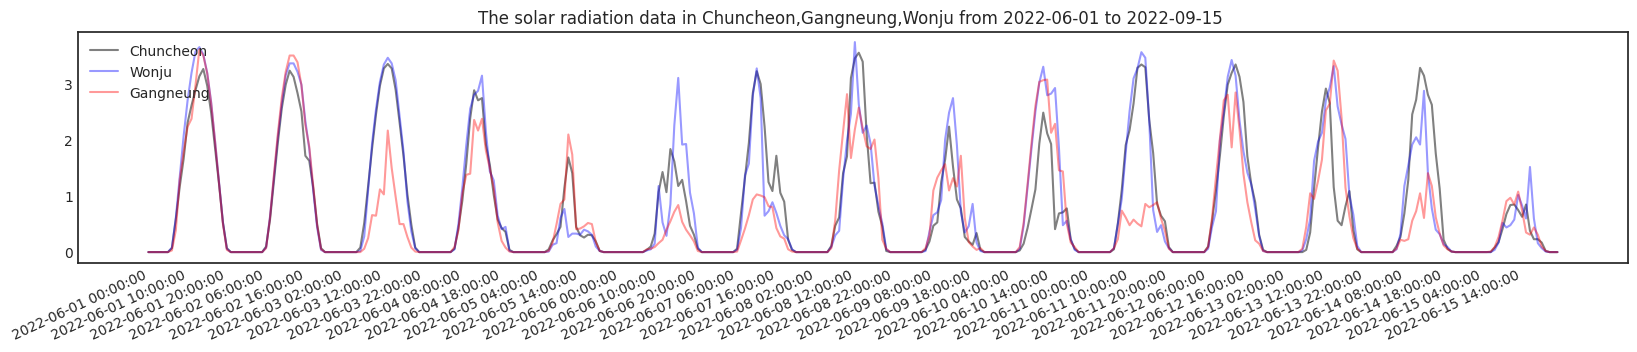

In [325]:
start = 0 
end = 0+24*15
city_lst = [3, 6, 9] # 춘천,원주(영서), 강릉(영동)
with plt.style.context('seaborn-white'):
    plt.rcParams['figure.figsize'] = [20, 3] 
    plt.plot(t[start:end],y[start:end,city_lst[0]],'-',label='Chuncheon', color='grey')
    plt.plot(t[start:end],y[start:end,city_lst[2]],'-',label='Wonju', color='blue', alpha=0.4)
    plt.plot(t[start:end],y[start:end,city_lst[1]],'-',label='Gangneung', color='red', alpha=0.4)
    tick_interval = 10
    plt.xticks(range(0, (end-start) + 1, tick_interval),rotation=25, ha='right')        
    plt.legend(loc='upper left')
    plt.title("The solar radiation data in {} from {} to {} ".format(','.join([name for name in [regions[i] for i in city_lst]]),t.to_list()[0][:10],t.to_list()[-1][:10]))

## Correlation Plot

In [8]:
import seaborn as sns

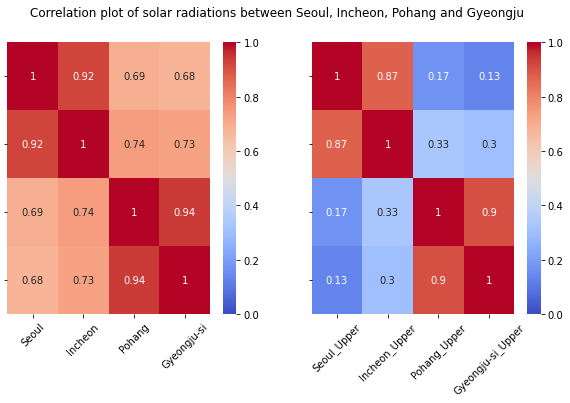

In [9]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))
# cmap_ = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df[['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si']].corr(), cmap='coolwarm', annot=True, ax=ax[0], vmin=0, vmax=1)
sns.heatmap(df[['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper']].corr(), cmap='coolwarm',annot=True,ax=ax[1], vmin=0, vmax=1)

ax[0].set_xticklabels(['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si'], rotation=45)
ax[0].set_yticklabels([])

ax[1].set_xticklabels(['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper'], rotation=45)
ax[1].set_yticklabels([])
plt.suptitle("Correlation plot of solar radiations between Seoul, Incheon, Pohang and Gyeongju")

plt.show()

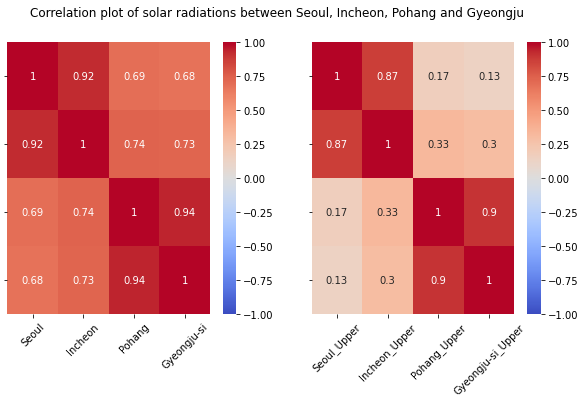

In [10]:
fig, ax = plt.subplots(1, 2,figsize=(10,5))
# cmap_ = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df[['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si']].corr(), cmap='coolwarm', annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.heatmap(df[['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper']].corr(), cmap='coolwarm',annot=True,ax=ax[1], vmin=-1, vmax=1)

ax[0].set_xticklabels(['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si'], rotation=45)
ax[0].set_yticklabels([])

ax[1].set_xticklabels(['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper'], rotation=45)
ax[1].set_yticklabels([])
plt.suptitle("Correlation plot of solar radiations between Seoul, Incheon, Pohang and Gyeongju")

plt.show()

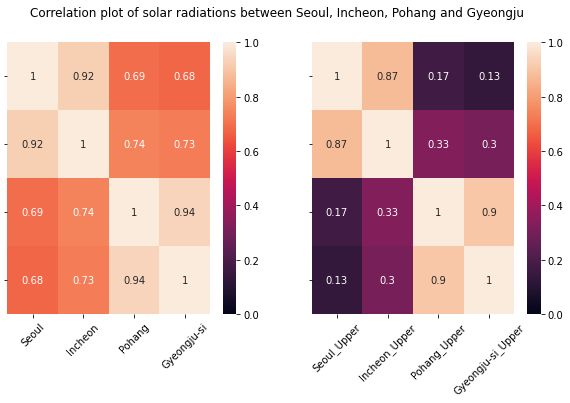

In [11]:
# default style
fig, ax = plt.subplots(1, 2,figsize=(10,5))
# cmap_ = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df[['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si']].corr(), annot=True, ax=ax[0], vmin=0, vmax=1)
sns.heatmap(df[['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper']].corr(),annot=True,ax=ax[1], vmin=0, vmax=1)

ax[0].set_xticklabels(['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si'], rotation=45)
ax[0].set_yticklabels([])

ax[1].set_xticklabels(['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper'], rotation=45)
ax[1].set_yticklabels([])
plt.suptitle("Correlation plot of solar radiations between Seoul, Incheon, Pohang and Gyeongju")

plt.show()

In [51]:
p_name = [name + '_P' for name in df.loc[:,'Bukchoncheon':'Gyeongju-si'].columns]

In [52]:
df_p = pd.DataFrame(yP)
df_p.columns = p_name
df_p

In [56]:
df2[['Seoul_P', 'Incheon_P', 'Pohang_P', 'Gyeongju-si_P']].corr()

In [54]:
df2 = pd.concat([df, df_p], axis=1)

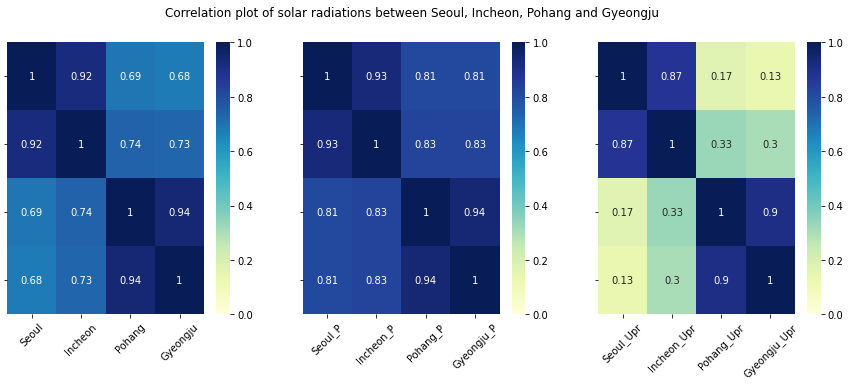

In [71]:
# default style
fig, ax = plt.subplots(1, 3,figsize=(15,5))
# cmap_ = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df[['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si']].corr(), cmap="YlGnBu", annot=True, ax=ax[0], vmin=0, vmax=1)
sns.heatmap(df2[['Seoul_P', 'Incheon_P', 'Pohang_P', 'Gyeongju-si_P']].corr(), cmap="YlGnBu", annot=True, ax=ax[1], vmin=0, vmax=1)
sns.heatmap(df[['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper']].corr(), cmap="YlGnBu", annot=True,ax=ax[2], vmin=0, vmax=1)

ax[0].set_xticklabels(['Seoul', 'Incheon', 'Pohang', 'Gyeongju'], rotation=45)
ax[0].set_yticklabels([])

ax[1].set_xticklabels(['Seoul_P', 'Incheon_P', 'Pohang_P', 'Gyeongju_P'], rotation=45)
ax[1].set_yticklabels([])
plt.suptitle("Correlation plot of solar radiations between Seoul, Incheon, Pohang and Gyeongju")

ax[2].set_xticklabels(['Seoul_Upr', 'Incheon_Upr', 'Pohang_Upr', 'Gyeongju_Upr'], rotation=45)
ax[2].set_yticklabels([])

# Add (1), (2), (3) labels to each subplot
# ax[0].text(0.5, -0.2, "(1)", transform=ax[0].transAxes, fontsize=12, ha='center')
# ax[1].text(0.5, -0.2, "(2)", transform=ax[1].transAxes, fontsize=12, ha='center')
# ax[2].text(0.5, -0.2 , "(3)", transform=ax[2].transAxes, fontsize=12, ha='center')


plt.show()

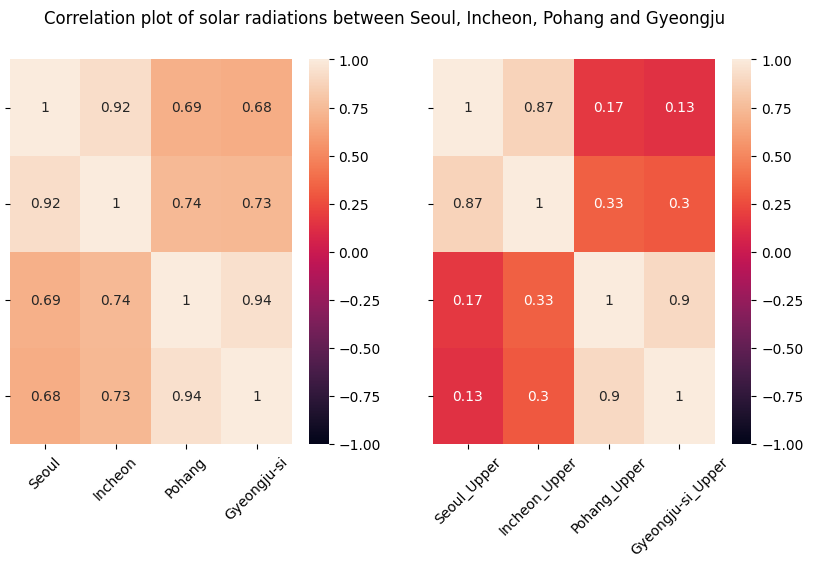

In [479]:
# default style
fig, ax = plt.subplots(1, 2,figsize=(10,5))
# cmap_ = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(df[['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si']].corr(), annot=True, ax=ax[0], vmin=-1, vmax=1)
sns.heatmap(df[['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper']].corr(),annot=True,ax=ax[1], vmin=-1, vmax=1)

ax[0].set_xticklabels(['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si'], rotation=45)
ax[0].set_yticklabels([])

ax[1].set_xticklabels(['Seoul_Upper', 'Incheon_Upper', 'Pohang_Upper', 'Gyeongju-si_Upper'], rotation=45)
ax[1].set_yticklabels([])
plt.suptitle("Correlation plot of solar radiations between Seoul, Incheon, Pohang and Gyeongju")

plt.show()

In [485]:
round(df[['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si']].corr(), 4)

In [486]:
df[[name+'_'+'Upper' for name in ['Seoul', 'Incheon', 'Pohang', 'Gyeongju-si']]].corr()

## Simulation Plot

In [418]:
import os
fnames = ['./test/'+l for l in os.listdir('./test') if l[0] != '.']

In [419]:
df = pd.concat([pd.read_csv(fname) for fname in fnames]).reset_index(drop=True)

In [420]:
# sub_df = df.query(f"model=='GConvGRU' and nof_filters=={nof_filters} and lags=={lags}").groupby(by=['model','method','index_time']).agg({'mse':[np.mean]}).reset_index()
# sub_df

### ver1. Compare separately by model

In [421]:
model_lst = df['model'].unique()
filter_lst = df['nof_filters'].unique()
lags_lst = df['lags'].unique()

In [422]:
filter_lst, lags_lst, model_lst

In [423]:
def compare_plot(model_name, style='seaborn-white'):
    with plt.style.context(style):
        fig, axes = plt.subplots(4, 5, figsize=(15, 12))

        for i, lags in enumerate(lags_lst):
            for j, nof_filters in enumerate(filter_lst):
                df_ = df.query(f"model=='{model_name}' and lags=={lags} and nof_filters=={nof_filters}").groupby(by=['model','method','index_time']).agg({'mse':[np.mean]}).reset_index()
                sns.boxplot(x='method', y=('mse', 'mean'), data=df_, ax=axes[i, j])
                axes[i, j].set_title(f'lags={lags}, nof_filters={nof_filters}')
                axes[i, j].set_ylabel('MSE')
        plt.subplots_adjust(top=0.95) 
        plt.suptitle(f"{model_name}", fontsize=16)
        plt.tight_layout()

`-` GConvGRU

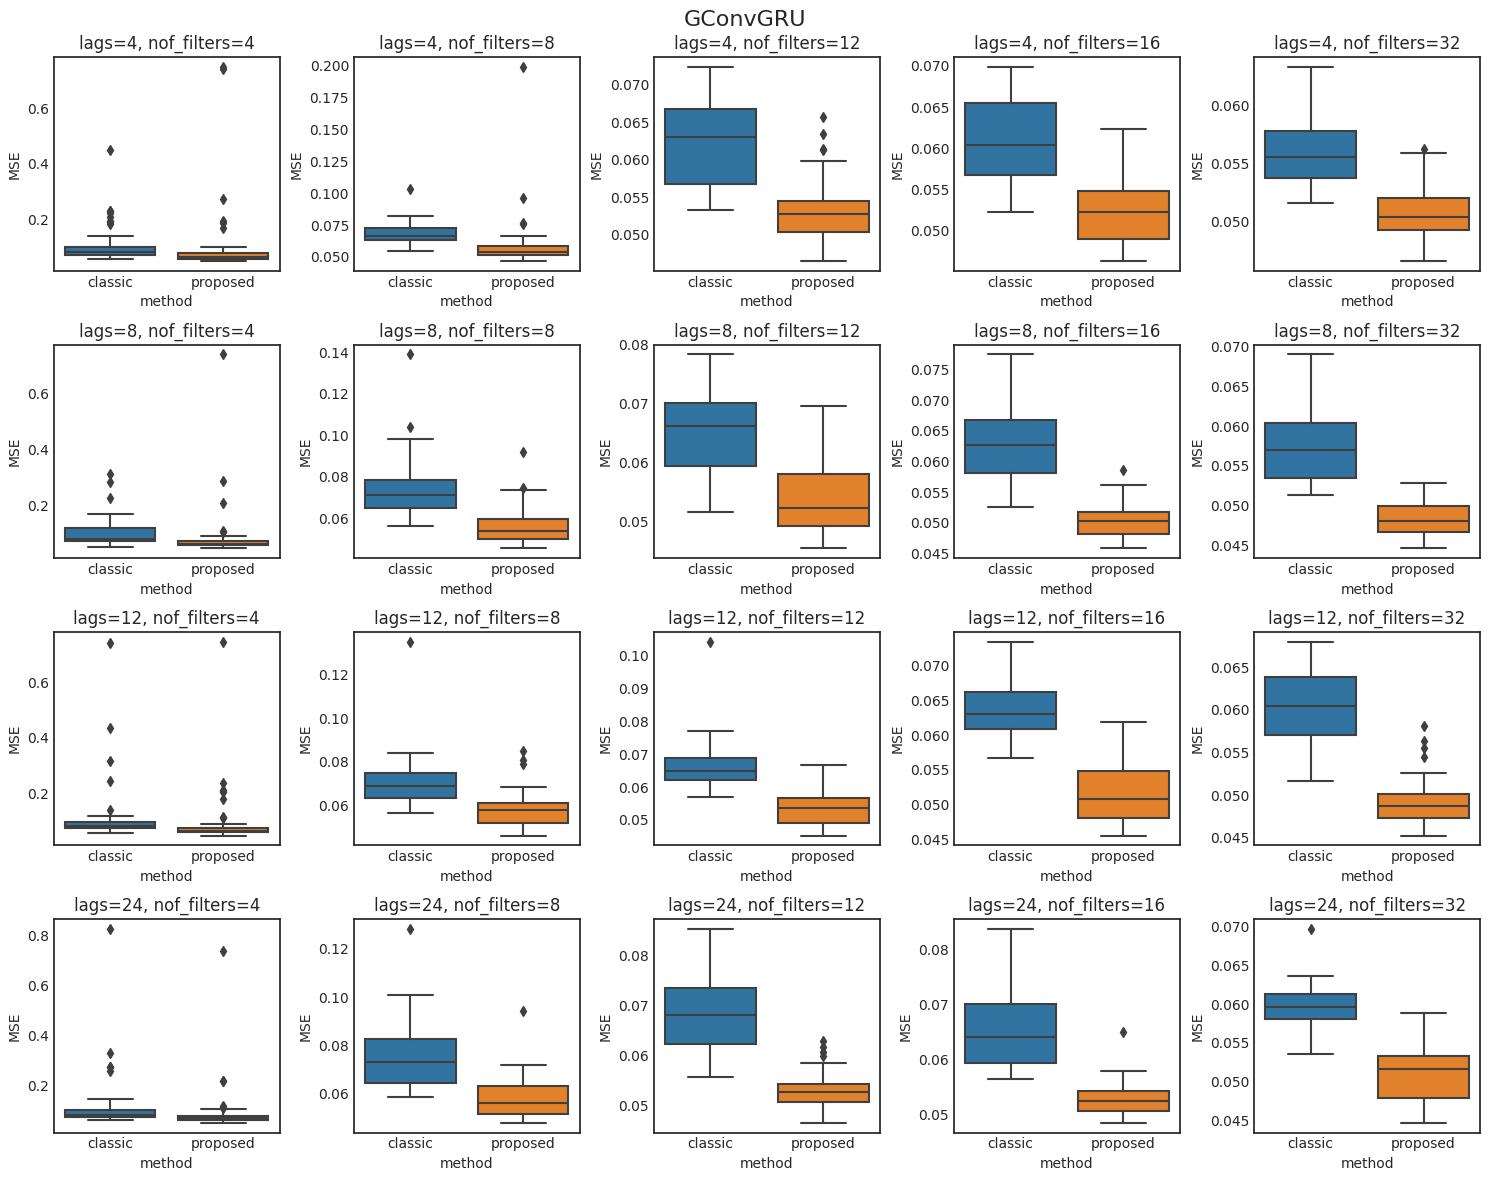

In [ ]:
compare_plot('GConvGRU')

`-` DCRNN

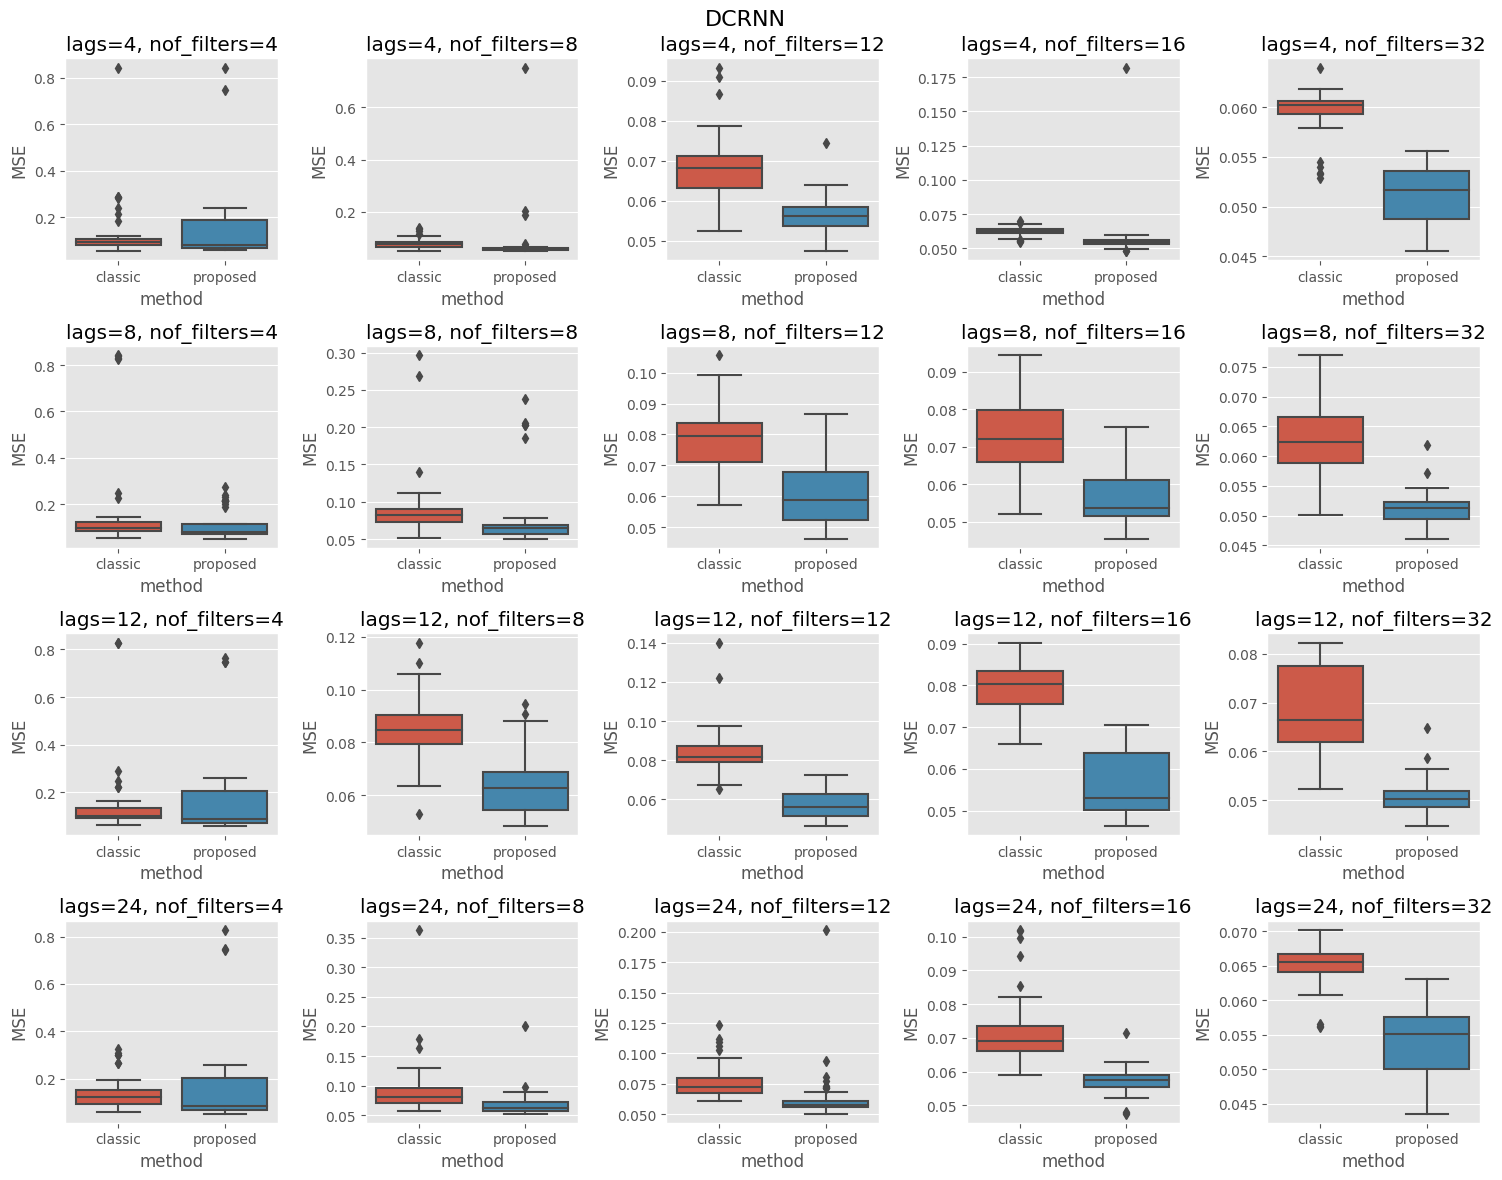

In [ ]:
compare_plot('DCRNN', style='ggplot')

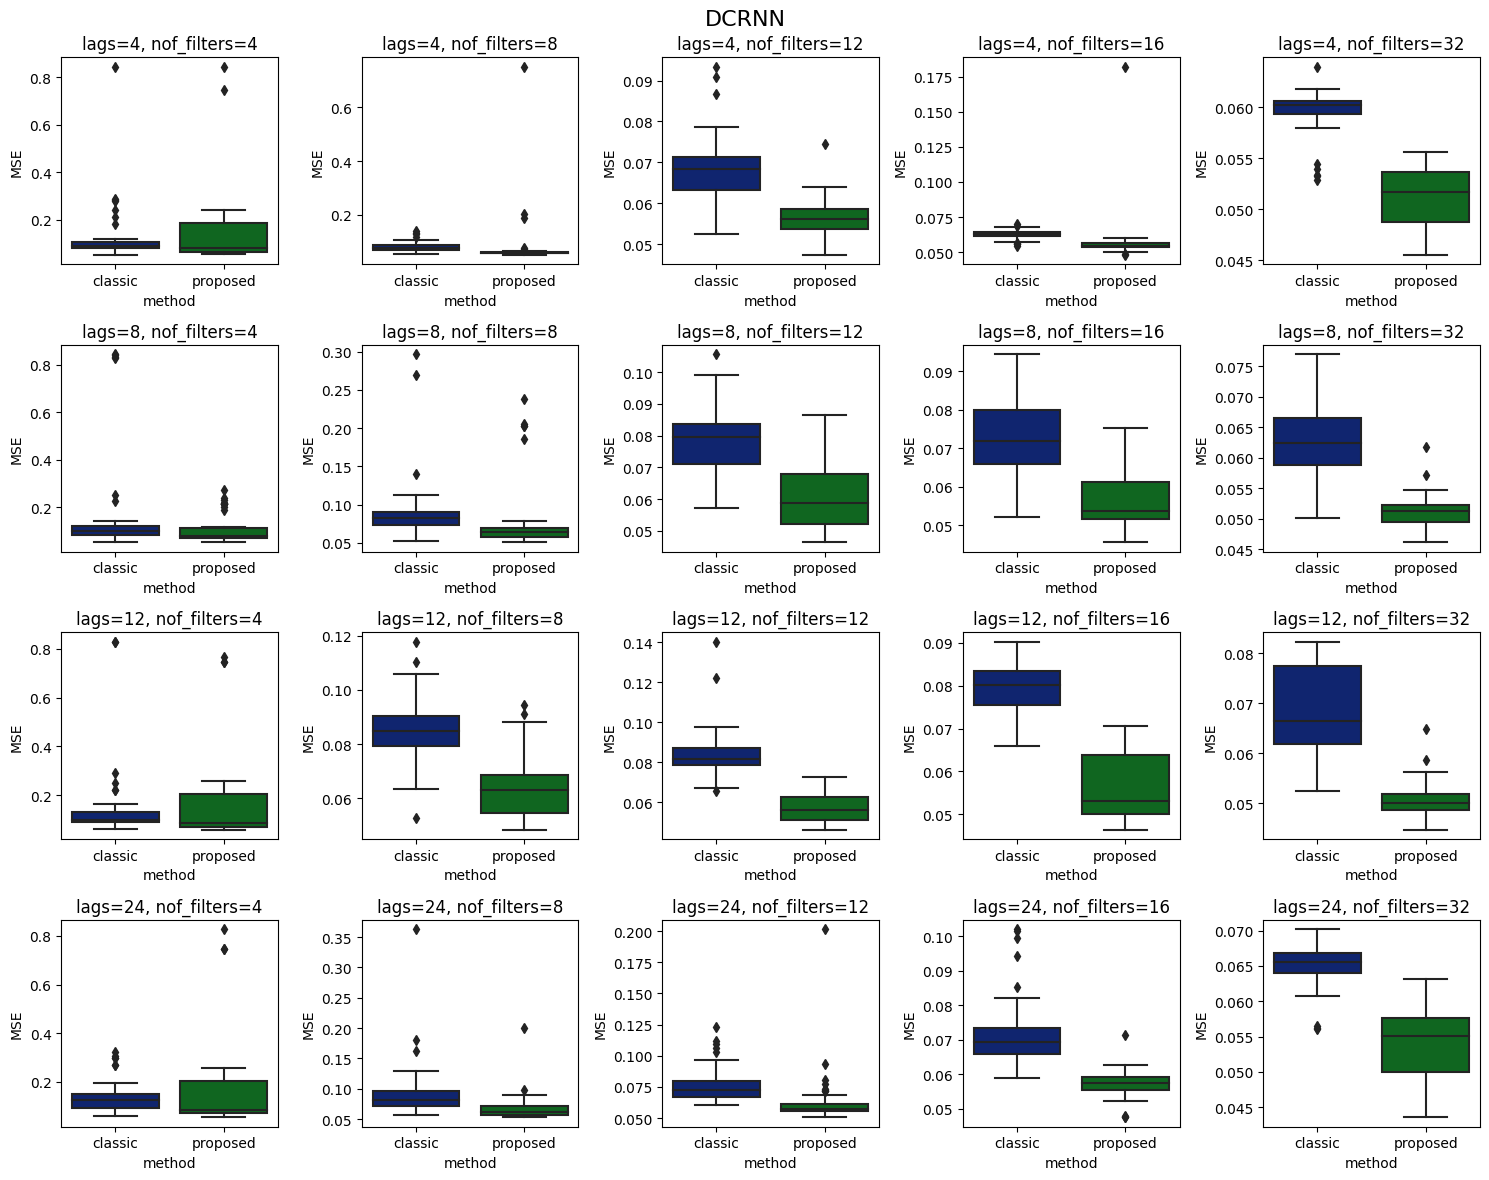

In [424]:
compare_plot('DCRNN', style='seaborn-v0_8-dark-palette')

In [ ]:
# print(plt.style.available)

`-` TGCN

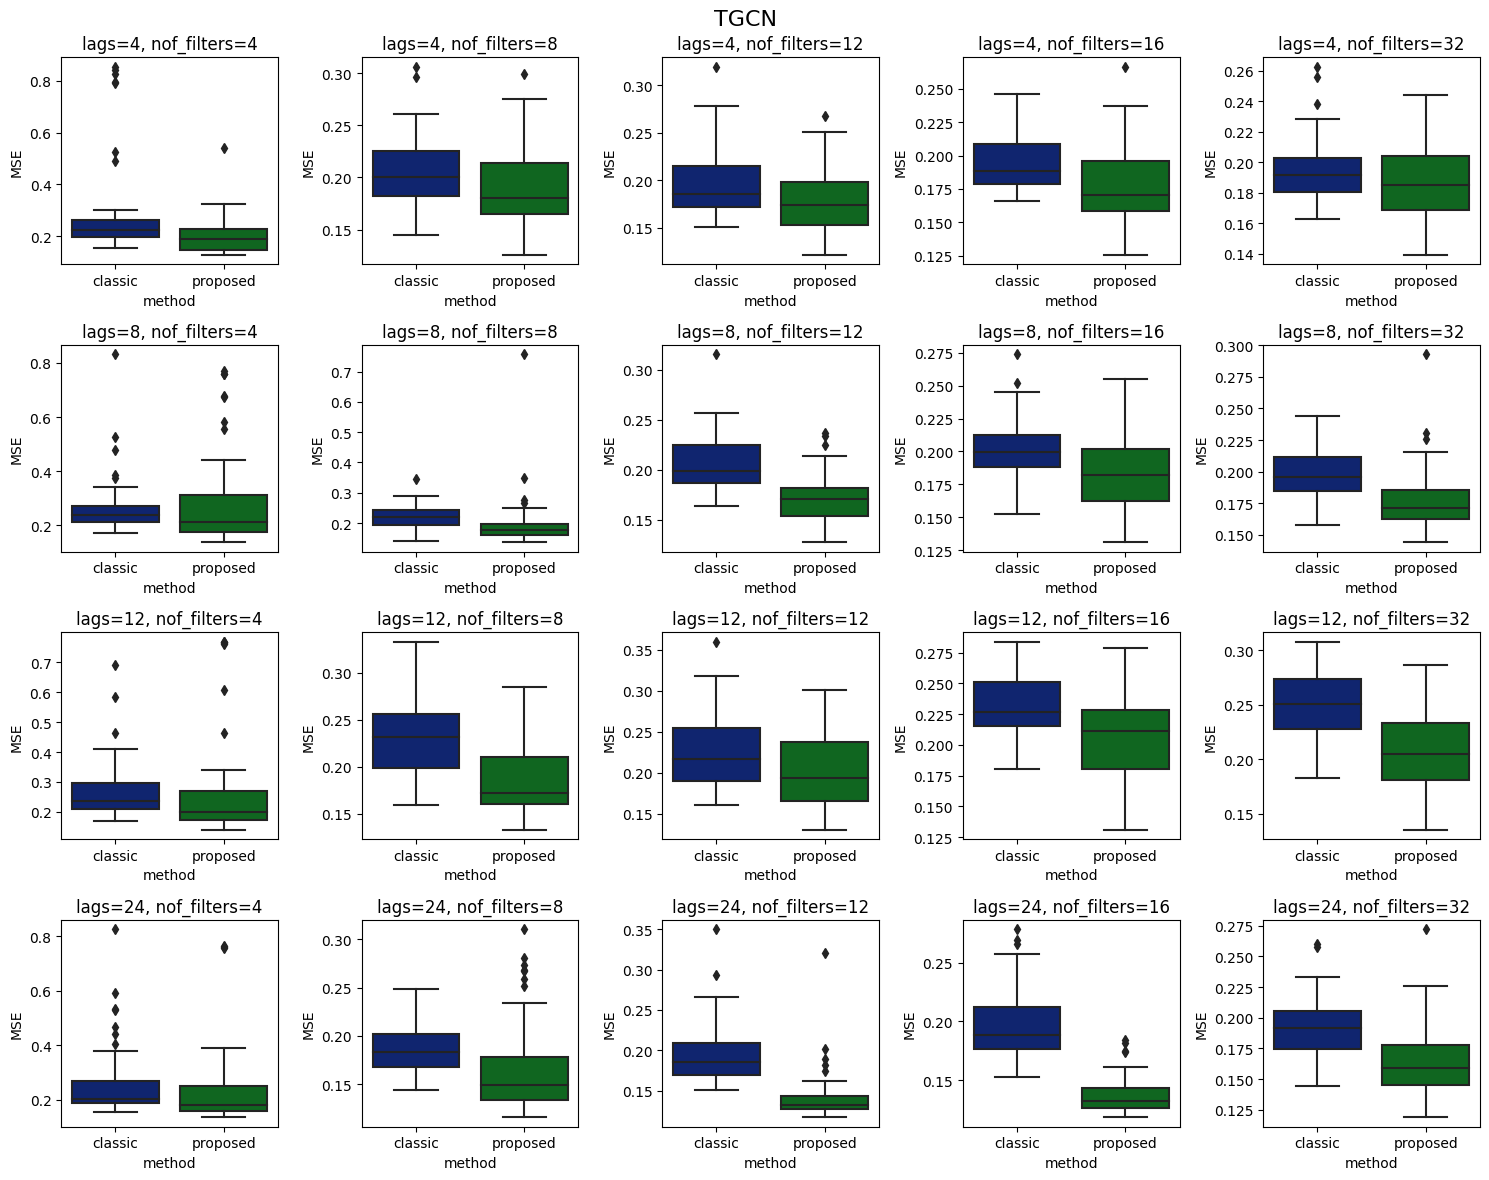

In [ ]:
compare_plot('TGCN', style='seaborn-v0_8-dark-palette')

In [ ]:
# pip install mplcyberpunk
# pip freeze > requirements.txt